In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


# Random Forest - Mod_1A
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# GBoost - Mod_2A
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

# Imblearn (Imbalanced Learn)
!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

df = pd.read_csv('dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4548 non-null   int64  
 1   GENDER            4520 non-null   object 
 2   SENIORCITIZEN     4523 non-null   float64
 3   PARTNER           4524 non-null   object 
 4   DEPENDENTS        4526 non-null   object 
 5   TENURE            4533 non-null   float64
 6   PHONESERVICE      4520 non-null   object 
 7   MULTIPLELINES     4523 non-null   object 
 8   INTERNETSERVICE   4524 non-null   object 
 9   ONLINESECURITY    4518 non-null   object 
 10  ONLINEBACKUP      4518 non-null   object 
 11  DEVICEPROTECTION  4524 non-null   object 
 12  TECHSUPPORT       4530 non-null   object 
 13  STREAMINGTV       4523 non-null   object 
 14  STREAMINGMOVIES   4523 non-null   object 
 15  CONTRACT          4525 non-null   object 
 16  PAPERLESSBILLING  4517 non-null   object 


,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,Female,0.0,No,No,26.0,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,6865,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,2799,Male,0.0,No,No,1.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,1584,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,9997,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No


In [2]:
df['CHURN'].value_counts(normalize = True)

No     0.733729
Yes    0.266271
Name: CHURN, dtype: float64

In [3]:
df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4548 non-null   int64  
 1   GENDER            4520 non-null   object 
 2   SENIORCITIZEN     4523 non-null   float64
 3   PARTNER           4524 non-null   object 
 4   DEPENDENTS        4526 non-null   object 
 5   TENURE            4533 non-null   float64
 6   PHONESERVICE      4520 non-null   object 
 7   MULTIPLELINES     4523 non-null   object 
 8   INTERNETSERVICE   4524 non-null   object 
 9   ONLINESECURITY    4518 non-null   object 
 10  ONLINEBACKUP      4518 non-null   object 
 11  DEVICEPROTECTION  4524 non-null   object 
 12  TECHSUPPORT       4530 non-null   object 
 13  STREAMINGTV       4523 non-null   object 
 14  STREAMINGMOVIES   4523 non-null   object 
 15  CONTRACT          4525 non-null   object 
 16  PAPERLESSBILLING  4517 non-null   object 


In [4]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4103 non-null   int64  
 1   GENDER            4103 non-null   object 
 2   SENIORCITIZEN     4103 non-null   float64
 3   PARTNER           4103 non-null   object 
 4   DEPENDENTS        4103 non-null   object 
 5   TENURE            4103 non-null   float64
 6   PHONESERVICE      4103 non-null   object 
 7   MULTIPLELINES     4103 non-null   object 
 8   INTERNETSERVICE   4103 non-null   object 
 9   ONLINESECURITY    4103 non-null   object 
 10  ONLINEBACKUP      4103 non-null   object 
 11  DEVICEPROTECTION  4103 non-null   object 
 12  TECHSUPPORT       4103 non-null   object 
 13  STREAMINGTV       4103 non-null   object 
 14  STREAMINGMOVIES   4103 non-null   object 
 15  CONTRACT          4103 non-null   object 
 16  PAPERLESSBILLING  4103 non-null   object 


In [5]:
X = pd.get_dummies(df.drop(['ID','CHURN'], axis = 1)).copy()
y = df['CHURN'].copy()

In [6]:
%%time
# Utilizando o Imbalanced-Learn
# Biblioteca já importada no início do script
# from imblearn.combine import SMOTETomek

# Definir o modelo (rus = Random Under Sample)
smtk = SMOTETomek(random_state=42)

# Construir o def_rus
X_smtk, y_smtk = smtk.fit_resample(X,y)

# Transformar X_smtk em DataFrame com os nomes originais
X_smtk = pd.DataFrame(X_smtk, columns=X.columns)

# Transformar y_smtk em Series
y_smtk = pd.Series(y_smtk)

Wall time: 562 ms


In [7]:
# Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X_smtk, y_smtk, test_size=0.3, random_state = 42)

In [8]:
# GBoost - Mod_2A

# Definir modelo
Regr_GB = GradientBoostingClassifier(random_state=42, n_estimators = 120)

# Fazer o ajuste
Mod_2A = Regr_GB.fit(X_train, y_train.values.ravel())

# Fazer predição
y_pred = Mod_2A.predict(X_test)

acc_2A = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc_2A}")

print(classification_report(y_test,y_pred))

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8755980861244019
              precision    recall  f1-score   support

          No       0.88      0.88      0.88       845
         Yes       0.87      0.88      0.87       827

    accuracy                           0.88      1672
   macro avg       0.88      0.88      0.88      1672
weighted avg       0.88      0.88      0.88      1672



In [9]:
ans = pd.read_csv('ANSWERS.csv')
ans['TOTALCHARGES'] = pd.to_numeric(ans['TOTALCHARGES'],errors = 'coerce')
ans.fillna(0, inplace = True)
ans['SENIORCITIZEN'] = ans['SENIORCITIZEN'].astype("float64")
ans['TENURE'] = ans['TENURE'].astype("float64")
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1324 non-null   int64  
 1   GENDER            1324 non-null   object 
 2   SENIORCITIZEN     1324 non-null   float64
 3   PARTNER           1324 non-null   object 
 4   DEPENDENTS        1324 non-null   object 
 5   TENURE            1324 non-null   float64
 6   PHONESERVICE      1324 non-null   object 
 7   MULTIPLELINES     1324 non-null   object 
 8   INTERNETSERVICE   1324 non-null   object 
 9   ONLINESECURITY    1324 non-null   object 
 10  ONLINEBACKUP      1324 non-null   object 
 11  DEVICEPROTECTION  1324 non-null   object 
 12  TECHSUPPORT       1324 non-null   object 
 13  STREAMINGTV       1324 non-null   object 
 14  STREAMINGMOVIES   1324 non-null   object 
 15  CONTRACT          1324 non-null   object 
 16  PAPERLESSBILLING  1324 non-null   object 


In [10]:
X_ans = pd.get_dummies(ans.drop(['ID','CHURN'], axis = 1)).copy()
X_ans

,SENIORCITIZEN,TENURE,MONTHLYCHARGES,TOTALCHARGES,GENDER_Female,GENDER_Male,PARTNER_No,PARTNER_Yes,DEPENDENTS_No,DEPENDENTS_Yes,...,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAPERLESSBILLING_No,PAPERLESSBILLING_Yes,PAYMENTMETHOD_Bank transfer (automatic),PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,0.0,3.0,51.71,90.81,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0.0,47.0,57.05,979.60,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.0,62.0,235.56,6140.91,0,1,0,1,1,0,...,1,0,1,0,1,0,0,0,1,0
3,0.0,1.0,142.25,142.25,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0.0,24.0,105.40,1398.95,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,0.0,4.0,23.41,75.76,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1320,0.0,63.0,62.51,6554.96,0,1,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
1321,0.0,61.0,227.81,6872.81,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
1322,0.0,11.0,7.33,747.88,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [11]:
X_ans.columns.tolist() == X_test.columns.tolist()

True

In [12]:
ANSWER = pd.read_csv('ANSWERS.csv')
ANSWER['CHURN'] = Mod_2A.predict(X_ans).copy()
ANSWER.head()

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,6946,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,51.71,90.81,No
1,2228,Male,0,No,No,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),57.05,979.6,No
2,3591,Male,0,Yes,No,62,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,One year,No,Electronic check,235.56,6140.91,No
3,1153,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,142.25,142.25,Yes
4,5227,Male,0,No,No,24,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,105.40,1398.95,No


In [13]:
ANSWER['CHURN'].value_counts(normalize = True)

No     0.765106
Yes    0.234894
Name: CHURN, dtype: float64

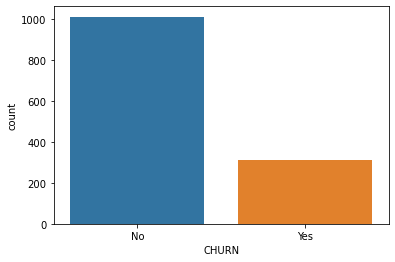

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

risk_plot = sns.countplot(data=ANSWER, x='CHURN', order=ANSWER['CHURN'].value_counts().index)
plt.show()

In [15]:
ANSWER.to_csv('./sub5/ANSWER.csv', index = False)